<a href="https://colab.research.google.com/github/Elsiekiprop/Dating-App-Recommender/blob/main/P5_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pata Mchumba Dating App Recommender

### Group Members

1. Fred Mutuma
2. Elsie Kiprop
3. Oscar Karuga
4. Iain Mosima
5. Peter Kigotho
6. Benson Muriu





## 1.1 Business Understanding.
With the current generation embracing technology and its applications, many people have become accustomed to the idea of using dating apps. Therefore, Pata Mchumba,  a dating company, has approached us to create a recommendation system for their users to increase the effectiveness of matches based on their preferences. Moreover our recommender will focus mainly on emotional connection rather than physical appearance. 

## 1.2 Objectives
### Main Objective:
To build a dating app recommender system that successfully maximises the matches.
### Specific Objectives
- To get and outline major factors that make a great match.

Answer the following questions:

- Which has more importance? Physical attraction or Personality.

- Which are the most common traits among users?

- To create a simple user interface for demonstration

## 1.3 Data Understanding
Our data was sourced from [here](https://www.tandfonline.com/doi/abs/10.1080/10691898.2015.11889737). We considered the ethical concerns and no rights were infringed in the collection of this data as OKCupid provided this data for use by the public.
The data contained 31 columns and 59964 columns.

## 1.4 Metrics for success
Our metric of success is Root Mean Squared Error (RMSE). We aim for a value that lies between 0.2 and 0.5 with a preference of the lowest value in this range for better accuracy of the model.

##1.5 Importing Libraries

In [ ]:
#Importing necessary libraries
import pandas as pd
import numpy as np


try:
  from tabulate import tabulate
except:
  !pip install tabulate
  from tabulate import tabulate


try:
  from pandas_profiling import ProfileReport
except:
  !pip install pandas-profiling
  from pandas_profiling import ProfileReport

  

from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# setting font size for all plots
font = {'size'   : 16}

plt.rc('font', **font)

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.0/268.0 KB 370.4 kB/s eta 0:00:00m eta 0:00:010:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 372.0 kB/s eta 0:00:00 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 737.2/737.2 KB 429.1 kB/s eta 0:00:001m441.6 kB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 255.8 kB/s eta 0:00:00m eta 0:00:010:00:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 363.3 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 598.5 kB/s eta 0:00:00m eta 0:00:010:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.4/296.4 KB 678.4 kB/s eta 0:00:00 kB/s eta 0:00:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 295.8 kB/s eta 0:00:00m eta 0:00:010:00:

In [ ]:
#Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1.5.1 Reading the Data

In [ ]:
#Importing dataset

dating_df = pd.read_csv('/content/drive/MyDrive/data/okcupid_profiles.csv')

In [ ]:
pd.set_option('display.max_columns',None)

In [ ]:
#First 5 rows of the data set
dating_df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,last_online,location,offspring,pets,religion,sign,smokes,speaks,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",75.0,-1,transportation,2012-06-28-20-30,"south san francisco, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism and very serious about it,gemini,sometimes,english,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,70.0,80000,hospitality / travel,2012-06-29-21-41,"oakland, california","doesn't have kids, but might want them",likes dogs and likes cats,agnosticism but not too serious about it,cancer,no,"english (fluently), spanish (poorly), french (...",i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,68.0,-1,NaN,2012-06-27-09-10,"san francisco, california",NaN,has cats,NaN,pisces but it doesn&rsquo;t matter,no,"english, french, c++","i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,71.0,20000,student,2012-06-28-14-22,"berkeley, california",doesn't want kids,likes cats,NaN,pisces,no,"english, german (poorly)",i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",66.0,-1,artistic / musical / writer,2012-06-27-21-26,"san francisco, california",NaN,likes dogs and likes cats,NaN,aquarius,no,english,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


###1.5.2 Checking the Data
In this section we will check for the shape of the data, number of unique vales and the number of missing values per column.

In [ ]:
#Checking for the shape of the data
print("Number of rows:", dating_df.shape[0])
print("Number of columns:", dating_df.shape[1],'\n')

Number of rows: 59946
Number of columns: 31 



The dataset has 59946 rows and 31 columns

In [ ]:
# Loop to check for missing values and unique values per column 
data_info = []
for i, column in enumerate(dating_df.columns):
    data_info.append([column, len(pd.unique(dating_df[column].values)), np.sum(pd.isnull(dating_df[column]))])

print(tabulate(data_info, headers=['Feature','No of unique values', 'No of null values']),"\n")   

Feature        No of unique values    No of null values
-----------  ---------------------  -------------------
age                             54                    0
status                           5                    0
sex                              2                    0
orientation                      3                    0
body_type                       13                 5296
diet                            19                24395
drinks                           7                 2985
drugs                            4                14080
education                       33                 6628
ethnicity                      218                 5680
height                          61                    3
income                          13                    0
job                             22                 8198
last_online                  30123                    0
location                       199                    0
offspring                       16              

The table above shows missing values per column and unique values per column. A number of columns have quite a huge number of missing values that we will deal with eventually in the notebook.

##1.6 Data Cleaning
In this section we will clean our data. This includes dealing with missing values. Natuaral Language processing will also be done to aid in cleaning text data in the essays columns.

###1.6.1 Checking null values percentage

In [ ]:
dating_df.isna().sum()/len(dating_df)*100

age             0.000000
status          0.000000
sex             0.000000
orientation     0.000000
body_type       8.834618
diet           40.694959
drinks          4.979482
drugs          23.487806
education      11.056618
ethnicity       9.475194
height          0.005005
income          0.000000
job            13.675641
last_online     0.000000
location        0.000000
offspring      59.321723
pets           33.231575
religion       33.740366
sign           18.443266
smokes          9.194942
speaks          0.083408
essay0          9.154906
essay1         12.631368
essay2         16.077803
essay3         19.143896
essay4         17.577486
essay5         18.099623
essay6         22.972342
essay7         20.770360
essay8         32.070530
essay9         21.023922
dtype: float64

Most of our columns seem to have the problem of missing data and that will be addressed in these subsequent cells. The `offspring` column is see to have the highest number of missing values at 59.3%.

###1.6.2 Checking datatypes

In [ ]:
#Checking the data type for each column
dating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   status       59946 non-null  object 
 2   sex          59946 non-null  object 
 3   orientation  59946 non-null  object 
 4   body_type    54650 non-null  object 
 5   diet         35551 non-null  object 
 6   drinks       56961 non-null  object 
 7   drugs        45866 non-null  object 
 8   education    53318 non-null  object 
 9   ethnicity    54266 non-null  object 
 10  height       59943 non-null  float64
 11  income       59946 non-null  int64  
 12  job          51748 non-null  object 
 13  last_online  59946 non-null  object 
 14  location     59946 non-null  object 
 15  offspring    24385 non-null  object 
 16  pets         40025 non-null  object 
 17  religion     39720 non-null  object 
 18  sign         48890 non-null  object 
 19  smok

In [ ]:
# checking for abnormality in the numerical columns
dating_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,59946.0,32.340290,9.452779,18.0,26.0,30.0,37.0,110.0
height,59943.0,68.295281,3.994803,1.0,66.0,68.0,71.0,95.0
income,59946.0,20033.222534,97346.192104,-1.0,-1.0,-1.0,-1.0,1000000.0


###1.6.2 The Body Type Column

In [ ]:
#check value count of body type
dating_df['body_type'].value_counts()

average           14652
fit               12711
athletic          11819
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
rather not say      198
Name: body_type, dtype: int64

For this column we will fill the missing values using with `unspecified` since a user may have skipped the section to fill in information on their body type.

In [ ]:
#Replacing the missing values with unspecified.
dating_df['body_type'].fillna('Unspecified',inplace=True)

In [ ]:
#check value count of diet
dating_df['diet'].value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
halal                     11
kosher                    11
Name: diet, dtype: int64

###1.6.3 The Diet Column


For this column we noticed that some of the option are similar therefore we will replace similar classes with the same class. 

In [ ]:
dating_df['diet'] = dating_df['diet'].replace(['mostly anything','strictly anything'],'anything')
dating_df['diet'] = dating_df['diet'].replace(['mostly vegetarian','strictly vegetarian','mostly vegan','strictly vegan','vegan'],'vegetarian')
dating_df['diet'] = dating_df['diet'].replace(['mostly halal','strictly halal'],'halal')
dating_df['diet'] = dating_df['diet'].replace(['mostly kosher','strictly kosher'],'kosher')
dating_df['diet'] = dating_df['diet'].replace(['mostly other','strictly other'],'other')

dating_df['diet'].fillna('Unspecified',inplace=True)

###1.6.4 The Drinks Column

The missing values in the drinks column will be replaced with unspecified since some users may choose not to disclose that information.

In [ ]:
#check value count of drinks
dating_df['drinks'].value_counts()

socially       41780
rarely          5957
often           5164
not at all      3267
very often       471
desperately      322
Name: drinks, dtype: int64

In [ ]:
dating_df['drinks'].fillna('Unspecified',inplace=True)

###1.6.5 The Drugs Column
Similar to the drinks column we will replace the null values with unspecified as some users chose not to put that information public.

In [ ]:
#check value count of drinks
dating_df['drugs'].value_counts()

never        37724
sometimes     7732
often          410
Name: drugs, dtype: int64

In [ ]:
#Replacing the null values with unspecified.
dating_df['drugs'].fillna('Unspecified',inplace=True)

###1.6.6 The Education Column

In [ ]:
dating_df['education'].value_counts()

graduated from college/university    23959
graduated from masters program        8961
working on college/university         5712
working on masters program            1683
graduated from two-year college       1531
graduated from high school            1428
graduated from ph.d program           1272
graduated from law school             1122
working on two-year college           1074
dropped out of college/university      995
working on ph.d program                983
college/university                     801
graduated from space camp              657
dropped out of space camp              523
graduated from med school              446
working on space camp                  445
working on law school                  269
two-year college                       222
working on med school                  212
dropped out of two-year college        191
dropped out of masters program         140
masters program                        136
dropped out of ph.d program            127
dropped out

In [ ]:
#Replacing the null values with unspecified because one may have not provided that information.
dating_df['education'].fillna('Unspecified',inplace=True)

###1.6.7 The Ethnicity Column

In [ ]:
dating_df['ethnicity'].value_counts()

white                                                                 32831
asian                                                                  6134
hispanic / latin                                                       2823
black                                                                  2008
other                                                                  1706
                                                                      ...  
middle eastern, indian, white                                             1
asian, middle eastern, black, white, other                                1
asian, middle eastern, indian, hispanic / latin, white, other             1
black, native american, indian, pacific islander, hispanic / latin        1
asian, black, indian                                                      1
Name: ethnicity, Length: 217, dtype: int64

In [ ]:
dating_df['ethnicity'].fillna('Unspecified',inplace=True)

###1.6.7 The Height Column

In [ ]:
#dating_df['height'].value_counts()

In [ ]:
# dropping null values in height 
# since there are only 0.005% are missing 

dating_df.dropna( subset=['height'],inplace=True)

###1.6.8 The Job Column

In [ ]:
dating_df['job'].value_counts()

other                                7589
student                              4882
science / tech / engineering         4848
computer / hardware / software       4709
artistic / musical / writer          4438
sales / marketing / biz dev          4391
medicine / health                    3680
education / academia                 3513
executive / management               2373
banking / financial / real estate    2266
entertainment / media                2250
law / legal services                 1381
hospitality / travel                 1364
construction / craftsmanship         1021
clerical / administrative             805
political / government                708
rather not say                        436
transportation                        366
unemployed                            273
retired                               250
military                              204
Name: job, dtype: int64

In [ ]:
#Filling the null values with unspecified.
dating_df['job'].fillna('Unspecified',inplace=True)

###1.6.9 The Offspring Column

In [ ]:
#Checking the number of each unique value in the offsprings column
dating_df['offspring'].value_counts()

doesn't have kids                          7559
doesn't have kids, but might want them     3875
doesn't have kids, but wants them          3565
doesn't want kids                          2927
has kids                                   1883
has a kid                                  1881
doesn't have kids, and doesn't want any    1132
has kids, but doesn't want more             442
has a kid, but doesn't want more            275
has a kid, and might want more              231
wants kids                                  225
might want kids                             182
has kids, and might want more               115
has a kid, and wants more                    71
has kids, and wants more                     21
Name: offspring, dtype: int64

In [ ]:
#Replacing the null values with unspecified
dating_df['offspring'].fillna('Unspecified',inplace=True)

###1.6.10 The Religion Column

In [ ]:
#Checking number of each unique value in the the religion column
dating_df['religion'].value_counts()

agnosticism                                   2724
other                                         2691
agnosticism but not too serious about it      2636
agnosticism and laughing about it             2496
catholicism but not too serious about it      2318
atheism                                       2175
other and laughing about it                   2119
atheism and laughing about it                 2074
christianity                                  1957
christianity but not too serious about it     1952
other but not too serious about it            1554
judaism but not too serious about it          1517
atheism but not too serious about it          1318
catholicism                                   1064
christianity and somewhat serious about it     927
atheism and somewhat serious about it          848
other and somewhat serious about it            846
catholicism and laughing about it              726
judaism and laughing about it                  681
buddhism but not too serious ab

#### Creating a religion serious column
This section deals with replacing the null values in the religion column with `unspecified` and classifying the religions into those who are serious and those who arent serious with religion. Those that are serious will be under class 1. Those that arent serious will be represented with 0 and those who have not discoled their religion will be represented by 2

In [ ]:
#Replacing null values with unspecified
dating_df['religion'].fillna('Unspecified',inplace=True)

In [ ]:
def religion_serious(value):
   # checking if a user is serious with his/her religion
    if value.__contains__('not') or value.__contains__('laughing'):
        return 0
    elif value.__contains__('Unspecified'):
        return 2
        
    return 1

In [ ]:
dating_df['religionSerious'] = dating_df.religion.copy().astype(str).apply(lambda x: religion_serious(x))
dating_df['religionSerious'].value_counts()

0    21207
2    20223
1    18513
Name: religionSerious, dtype: int64

In [ ]:
# checking if the religion_serious function worked
dating_df[['religionSerious','religion']].sample(30)

,religionSerious,religion
17303,2,Unspecified
9190,1,agnosticism and very serious about it
1749,1,judaism and somewhat serious about it
6202,0,atheism and laughing about it
17150,2,Unspecified
36541,0,christianity but not too serious about it
54864,2,Unspecified
55042,2,Unspecified
44968,2,Unspecified
34071,2,Unspecified


**Creating a religion only column**



In [ ]:
def religion(value):
    # splitting the column and extracting the first string
    religion = value.split(' ')[0]
    return religion

In [ ]:
dating_df.religion = dating_df.religion.astype(str).apply(lambda x: religion(x))
dating_df.religion[:10]

0     agnosticism
1     agnosticism
2     Unspecified
3     Unspecified
4     Unspecified
5         atheism
6     Unspecified
7    christianity
8    christianity
9         atheism
Name: religion, dtype: object

In [ ]:
# checking the value counts and converting the column into a string datatype
dating_df.religion.value_counts()

Unspecified     20223
agnosticism      8812
other            7743
atheism          6985
christianity     5787
catholicism      4758
judaism          3098
buddhism         1948
hinduism          450
islam             139
Name: religion, dtype: int64

###1.6.11 The Zodiac Column
To deal with the missing values in this section, we will fill the missing values with uninterested as zodiac signs do not matter to some people.
We will further clean the column and only pick out the zodiac sign and remove the rest of the text in each row.

In [ ]:
dating_df['sign'].value_counts()

gemini and it&rsquo;s fun to think about         1782
scorpio and it&rsquo;s fun to think about        1772
leo and it&rsquo;s fun to think about            1692
libra and it&rsquo;s fun to think about          1649
taurus and it&rsquo;s fun to think about         1640
cancer and it&rsquo;s fun to think about         1597
pisces and it&rsquo;s fun to think about         1592
sagittarius and it&rsquo;s fun to think about    1583
virgo and it&rsquo;s fun to think about          1574
aries and it&rsquo;s fun to think about          1573
aquarius and it&rsquo;s fun to think about       1503
virgo but it doesn&rsquo;t matter                1497
leo but it doesn&rsquo;t matter                  1457
cancer but it doesn&rsquo;t matter               1454
gemini but it doesn&rsquo;t matter               1453
taurus but it doesn&rsquo;t matter               1450
libra but it doesn&rsquo;t matter                1408
aquarius but it doesn&rsquo;t matter             1408
capricorn and it&rsquo;s fun

**Creating a sign serious column**

In [ ]:
#Replacing the missing values with uninterested.
dating_df['sign'].fillna('Uninterested',inplace=True)

In [ ]:
def sign_serious(value):
   # checking if a user is serious with his/her religion
    if value.__contains__('doesn&rsquo;t'):
        return 0
    elif value.__contains__('it&rsquo;s'):
        return 1
        
    return 2

In [ ]:
dating_df['signSerious'] = dating_df.sign.copy().astype(str).apply(lambda x: sign_serious(x))
dating_df['signSerious'].value_counts()

2    23852
1    19333
0    16758
Name: signSerious, dtype: int64

In [ ]:
# checking if the religion_serious function worked
dating_df[['signSerious','sign']].sample(30)

,signSerious,sign
28183,1,leo and it&rsquo;s fun to think about
39248,1,virgo and it&rsquo;s fun to think about
16223,0,leo but it doesn&rsquo;t matter
3741,0,aries but it doesn&rsquo;t matter
21840,2,cancer
10908,2,Uninterested
37875,0,leo but it doesn&rsquo;t matter
40957,1,virgo and it&rsquo;s fun to think about
3723,0,sagittarius but it doesn&rsquo;t matter
47621,0,aries but it doesn&rsquo;t matter


**Creating a zodiac only column**

In [ ]:
# doing the same thing as in the religion function
def zodiac_sign(value):
    zodiac = value.split(' ')[0]
    return zodiac

In [ ]:
dating_df.sign = dating_df.sign.astype(str).apply(lambda x: zodiac_sign(x))
dating_df.sign[:10]

0         gemini
1         cancer
2         pisces
3         pisces
4       aquarius
5         taurus
6          virgo
7    sagittarius
8         gemini
9         cancer
Name: sign, dtype: object

###1.6.11 The Smokes Column

In [ ]:
# checking the value counts
dating_df['smokes'].value_counts()

no                43895
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

In [ ]:
# Fill null values with unspecified
dating_df['smokes'].fillna('Unspecified',inplace=True)

###1.6.12 The Speaks Column

In [ ]:
# Checking the value counts 
dating_df['speaks'].value_counts()

english                                                                21827
english (fluently)                                                      6627
english (fluently), spanish (poorly)                                    2059
english (fluently), spanish (okay)                                      1917
english (fluently), spanish (fluently)                                  1288
                                                                       ...  
english (fluently), urdu (poorly), japanese (poorly), french (okay)        1
english, spanish, hindi, c++                                               1
english (fluently), japanese (okay), thai (okay), chinese (poorly)         1
english (fluently), french (okay), italian (okay), hebrew (okay)           1
english (fluently), french, farsi                                          1
Name: speaks, Length: 7647, dtype: int64

In [ ]:
# filling null values with unspecified
dating_df['speaks'].fillna('Unspecified',inplace=True)

Since we are considering an emotional match recommender system we won't consider height,job and income to prevent the recommender system from being biased

###1.6.13 Dropping columns

In [ ]:
# Dropping features not to be utilized by the recommendation engine
dating_df = dating_df.drop(columns=['ethnicity', 'height', 'income', 'job', 'offspring', 'speaks', 'last_online'])

###1.6.14 Filtering out the data

In [ ]:
# keep only available people in the recommendation database 
dating_df = dating_df[dating_df.status.isin(['single', 'available'])].drop(columns='status')

###1.6.15 The Location Column

In [ ]:
dating_df['location'].value_counts()

san francisco, california    29919
oakland, california           6886
berkeley, california          3977
san mateo, california         1291
palo alto, california         1013
                             ...  
sunnyvale, california            1
islip terrace, new york          1
boise, idaho                     1
peoria, illinois                 1
rochester, michigan              1
Name: location, Length: 193, dtype: int64

In [ ]:
# taking the state only from the location column
def state_getter(string):
    return string.split(',')[1]

dating_df['state'] = dating_df.location.apply(lambda x: state_getter(x))
# printing total states
print('Number of states:', len(dating_df['state'].unique()))
dating_df.state.value_counts()[:10]

Number of states: 38


 california              57473
 new york                   16
 illinois                    8
 texas                       4
 oregon                      4
 massachusetts               4
 michigan                    4
 arizona                     3
 florida                     3
 district of columbia        2
Name: state, dtype: int64

In [ ]:
# droppping the location column
dating_df.drop('location', axis=1, inplace=True)

### 1.6.16 The Pets Column

In [ ]:
# checking the sum of null values
dating_df.pets.isna().sum()

19382

In [ ]:
# filling null values with unspecified
dating_df.pets.fillna('Unspecified', inplace=True)
dating_df.pets.isna().sum()

0

In [ ]:
dating_df['pets'].value_counts()

Unspecified                        19382
likes dogs and likes cats          14100
likes dogs                          7026
has dogs                            4022
likes dogs and has cats             4000
has dogs and likes cats             2223
likes dogs and dislikes cats        1960
has dogs and has cats               1373
has cats                            1328
likes cats                           973
has dogs and dislikes cats           534
dislikes dogs and likes cats         215
dislikes dogs and dislikes cats      188
dislikes cats                        121
dislikes dogs and has cats            72
dislikes dogs                         42
Name: pets, dtype: int64

In [ ]:
# replacing has with likes
# 1. The code checks if the value is a string
# 2. If it is a string, it replaces the word 'has' with 'likes'
# 3. If it is not a string, it returns the value as it is

dating_df.pets = dating_df.pets.apply(lambda x: x.replace('has', 'likes') if isinstance(x, str) else x)

In [ ]:
dating_df['pets'].value_counts()

likes dogs and likes cats          21696
Unspecified                        19382
likes dogs                         11048
likes dogs and dislikes cats        2494
likes cats                          2301
dislikes dogs and likes cats         287
dislikes dogs and dislikes cats      188
dislikes cats                        121
dislikes dogs                         42
Name: pets, dtype: int64

In [ ]:
# using label encoder
le = LabelEncoder()
dating_df.pets = le.fit_transform(dating_df.pets)
dating_df.pets.value_counts()

8    21696
0    19382
6    11048
7     2494
5     2301
4      287
3      188
1      121
2       42
Name: pets, dtype: int64

In [ ]:
# inversing
le.inverse_transform(dating_df.pets)

array(['likes dogs and likes cats', 'likes dogs and likes cats',
       'likes cats', ..., 'Unspecified', 'likes dogs and likes cats',
       'likes dogs and likes cats'], dtype=object)

In [ ]:
dating_df.columns

Index(['age', 'sex', 'orientation', 'body_type', 'diet', 'drinks', 'drugs',
       'education', 'pets', 'religion', 'sign', 'smokes', 'essay0', 'essay1',
       'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8',
       'essay9', 'religionSerious', 'signSerious', 'state'],
      dtype='object')

### 1.6.17 The Age Column

In [ ]:
dating_df.age.describe().T

count    57559.000000
mean        32.419604
std          9.510161
min         18.000000
25%         26.000000
50%         30.000000
75%         37.000000
max        110.000000
Name: age, dtype: float64

There seems to be prescence of outliers in the age column

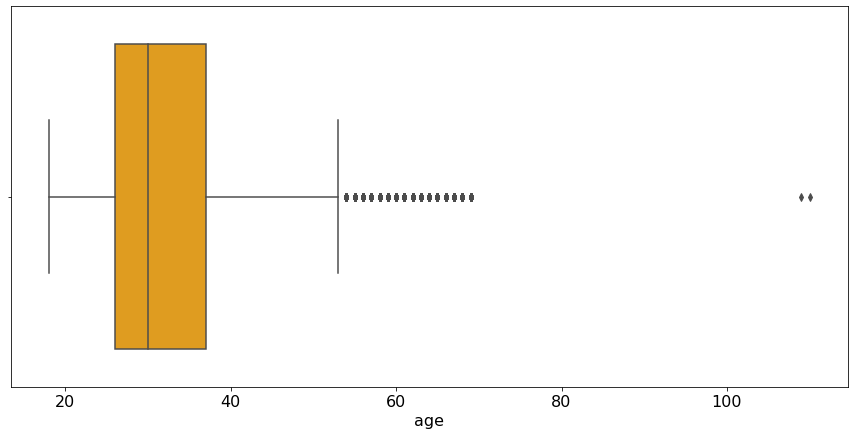

In [ ]:
# plotting the outliers
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x=dating_df.age, ax=ax, color='orange')
plt.show()

In [ ]:
# checking the 95% quantile range
dating_df.age.quantile(.95)

52.0

In [ ]:
# capping of ages above the 95% quantile to be the same value as the 95% quantile
def age_capoff(value, cap_off_age=52):
  if value > cap_off_age:
        return cap_off_age

  return value

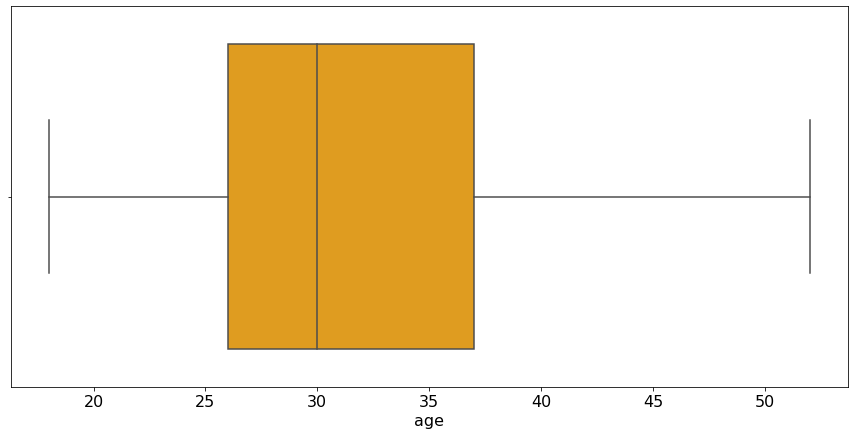

In [ ]:
# plotting after dealing with the outliers
fig, ax = plt.subplots(figsize=(15,7))
sns.boxplot(x=dating_df.age.apply(lambda x: age_capoff(x)), ax=ax, color='orange')
plt.show()

In [ ]:
# replacing the values in the age column
dating_df.age = dating_df.age.apply(lambda x: age_capoff(x))

## 1.7 Exploratory Data Analysis
In the EDA section we will create a number of visualizations to have a better understanding of our data and its attributes.

In [ ]:
#Function that will help in allocating percentages to different features in our plots.
def feature_percentage(plot, variable):
    total = len(variable)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()+p.get_width()/2-0.1
        y = p.get_y()+p.get_height()
        ax.annotate(percentage, (x, y), size=10)

### 1.7.1 Gender Analysis.

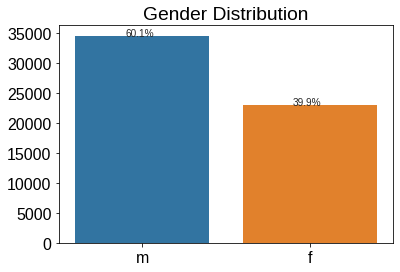

In [ ]:
gender = dating_df['sex'].value_counts()
ax=sns.barplot(x=gender.index, y=gender.values)
plt.title('Gender Distribution')

plt.style.use('seaborn')
feature_percentage(ax,dating_df)
plt.show()

From the above plot majority of the users are male at 59.8% and female follow closely at 40.2%

### 1.7.2 Age Analysis

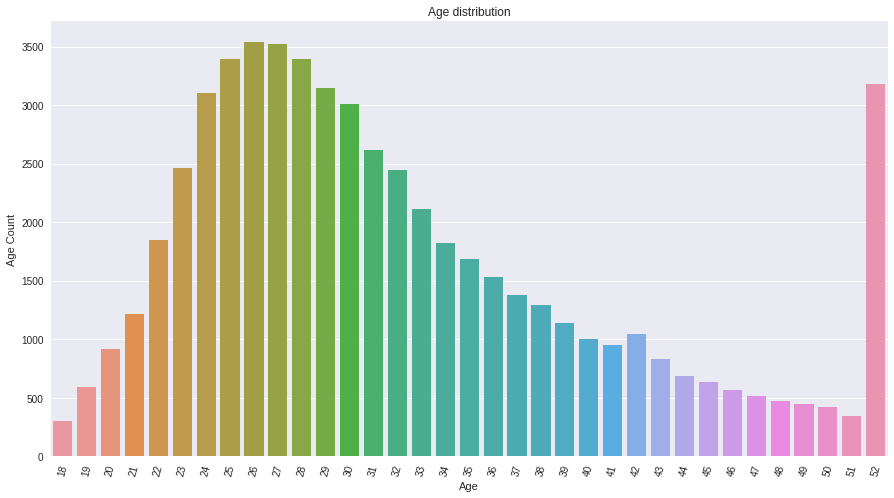

In [ ]:
#Plot showing age distribution
#plt.hist(x=dating_df.age)
age= dating_df['age'].value_counts()
plt.figure(figsize=(15,8))
sns.barplot(x=age.index, y=age.values)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Age Count')
plt.style.use('seaborn')
plt.xticks(rotation=75)
plt.show()

Majority of the users are between 22 and 35. However there seems to be odd ages on the dating site such as 109.

In [ ]:
#Checking for the minimum age and maximum age
print("min age:", dating_df['age'].min())
print("max age:", dating_df['age'].max())

min age: 18
max age: 52


In [ ]:
# Binning the ages to allow for better visualization
dating_df['age_bin']=pd.cut(x=dating_df['age'],bins=list(range(18,52,5)))

<Figure size 1440x720 with 0 Axes>

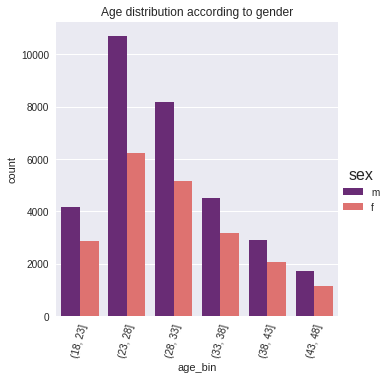

In [ ]:
#Plotting the age distribution
plt.figure(figsize=(20,10))
sns.catplot(x='age_bin', data= dating_df, kind='count',palette='magma',hue='sex')
plt.xticks(rotation=75)
plt.title('Age distribution according to gender')
plt.show()


Majority of the users of this app are male. Most of them are aged 23 to 28. That same age bracket holds the highest number of female users.

### 1.7.3 Investiging orientation count
In this section we will investigate orientation count based on each gender.

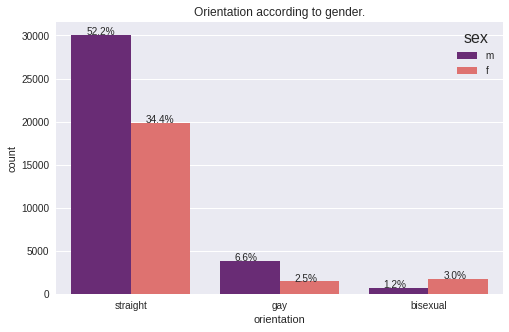

In [ ]:
#Plotting orinetation according to gender
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='orientation', data=dating_df, hue='sex', palette='magma',order=dating_df['orientation'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('Orientation according to gender.')
feature_percentage(ax,dating_df)
plt.show()


Majority of the users are of the orientation straight. Most of the straight users are male. This is the same case for the gay orientation For the bisexual orientation, majority are female.



###1.7.4 Investigating drug usage
In this section we investigate 3 columns i.e `drugs`, `drinks` and `smokes`


In [ ]:
#Drugs column
dating_df['drugs'].value_counts()

never          36428
Unspecified    13506
sometimes       7235
often            390
Name: drugs, dtype: int64

From the above information majority of the users do not drink while the minority drink often. We will visualize this in the plot below

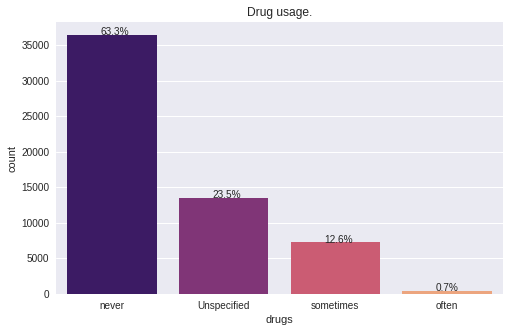

In [ ]:

plt.figure(figsize=(8, 5))
ax = sns.countplot(x='drugs', data=dating_df,  palette='magma',order=dating_df['drugs'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('Drug usage.')
feature_percentage(ax,dating_df)
plt.show()

It is evident that majority of the users(62.9%) do not do drugs.

###1.7.5 Investigating smoking frequency

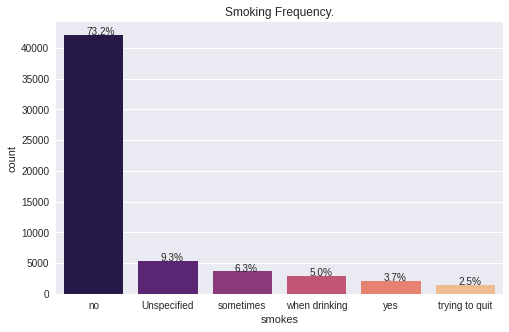

In [ ]:
#Visualization to show the count of users per smoking frequency.
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='smokes', data=dating_df,  palette='magma',order=dating_df['smokes'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('Smoking Frequency.')
feature_percentage(ax,dating_df)
plt.show()

73.2% of the dating app users do not smoke while those trying to quit take the lowest percentage at 2.5%

### 1.7.6 Alcohol Consumption

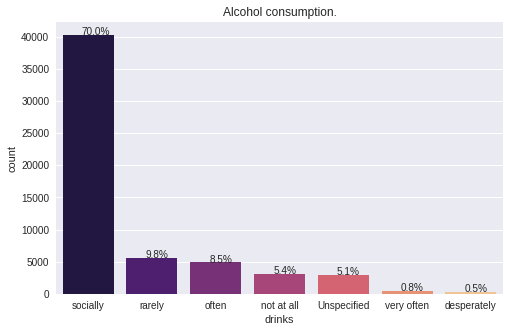

In [ ]:
#Visualizing the frequency of alcohol consumption among the users
plt.figure(figsize=(8, 5))
ax = sns.countplot(x='drinks', data=dating_df,  palette='magma',order=dating_df['drinks'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('Alcohol consumption.')
feature_percentage(ax,dating_df)
plt.show()

During the cleaning, it will be very prudent to deal with the `-1` value.

###1.7.7 Diet preferences


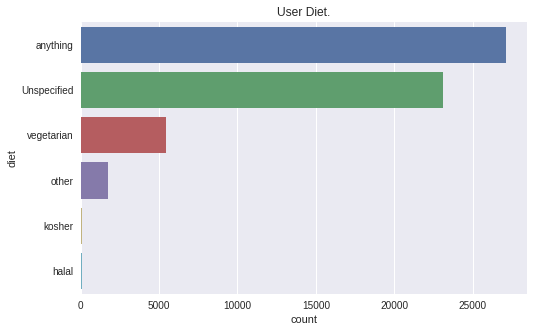

In [ ]:
#Checking the distribution of diet preferences among the users.
plt.figure(figsize=(8, 5))
ax = sns.countplot(y='diet', data=dating_df,order=dating_df['diet'].value_counts().iloc[:10].index) 
total = float(len(dating_df))
plt.title('User Diet.')

plt.show()

###1.7.7 Pets preferences

In [ ]:
dating_df.pets.value_counts()

8    21696
0    19382
6    11048
7     2494
5     2301
4      287
3      188
1      121
2       42
Name: pets, dtype: int64

In [ ]:
le.inverse_transform(dating_df.pets.value_counts().index)

array(['likes dogs and likes cats', 'Unspecified', 'likes dogs',
       'likes dogs and dislikes cats', 'likes cats',
       'dislikes dogs and likes cats', 'dislikes dogs and dislikes cats',
       'dislikes cats', 'dislikes dogs'], dtype=object)

In [ ]:
# creating a pets df
pets_df = pd.DataFrame(data=dating_df.pets.value_counts().values, index=dating_df.pets.value_counts().index, columns=['counts'])
pets_df['relationship'] = le.inverse_transform(dating_df.pets.value_counts().index)
pets_df.head()

,counts,relationship
8,21696,likes dogs and likes cats
0,19382,Unspecified
6,11048,likes dogs
7,2494,likes dogs and dislikes cats
5,2301,likes cats


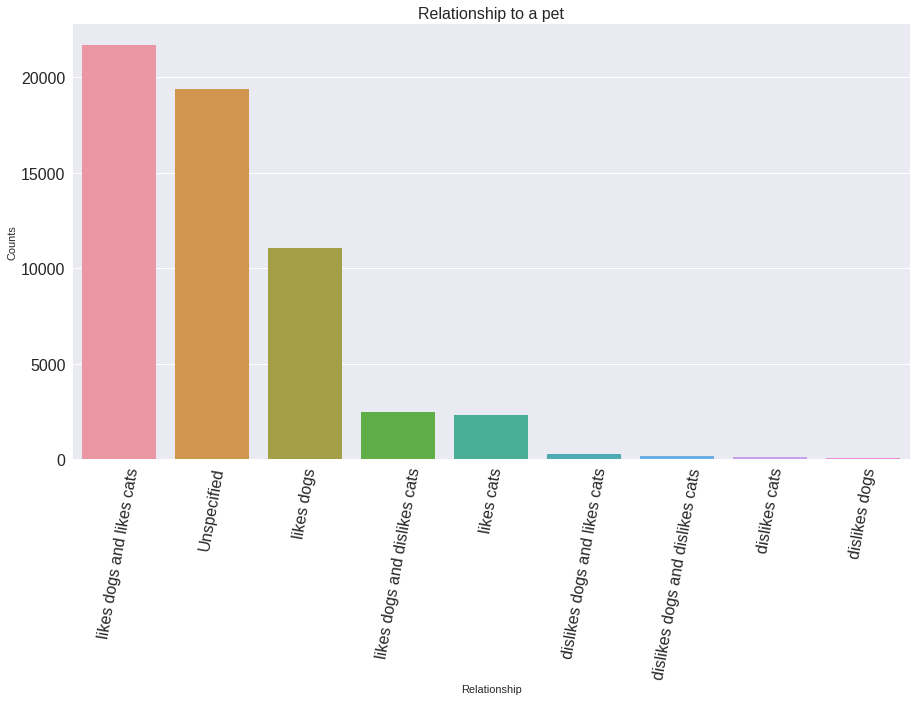

In [ ]:
#Plot showing age distribution
#plt.hist(x=dating_df.age)
plt.figure(figsize=(15,8))
sns.barplot(x=pets_df.relationship, y=pets_df.counts)
plt.title('Relationship to a pet', fontsize=16)
plt.xlabel('Relationship')
plt.ylabel('Counts')
plt.style.use('seaborn')
plt.xticks(rotation=80, fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## 2.0 Text Cleaning & Preprocessing & More Exploration

Notice the essay columns are untouched upto now. This section eill deal with the text data that makes up the essay columns. proper labeling of the columns too.

Then some visualizations before building the model later on.

For starters the following will be performed:
- Remove punctuation and numbers
- Lowercase everything
- Remove stopwords
- Create a document term matrix grouped by essay 
    - count vectorization
    - tf-idf vectorization
    - bi-grams
- Visualize most frequent words
    - word clouds
    - bar plot/histogram

Check the dataframe before proceeding; change the essay column titles to something more meaningful

essay meanings:
 - essay
    - 0: My self summary
    - 1: What I’m doing with my life
    - 2: I’m really good at...
    - 3: The first thing people usually notice about me...
    - 4: Favourite books, movies, show, music, and food
    - 5: The six things I could never do without
    - 6: I spend a lot of time thinking about...
    - 7: On a typical Friday night I am...
    - 8: The most private thing I am willing to admit...
    - 9: You should message me if...


In [ ]:
# change the names of essay columns to meaningful words

dating_df.rename(columns = {'essay0':'selfSummary', 'essay1':'currentLife', 'essay2':'goodAt',
                     'essay3':'noticeFirst', 'essay4':'Favourites', 'essay5':'preciousThings',
                     'essay6':'thinkAbout', 'essay7':'typicalFriday', 'essay8':'privateAdmission',
                     'essay9':'messageIf'}, inplace = True)

In [ ]:
# check the new column names
dating_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57559 entries, 0 to 59945
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               57559 non-null  int64   
 1   sex               57559 non-null  object  
 2   orientation       57559 non-null  object  
 3   body_type         57559 non-null  object  
 4   diet              57559 non-null  object  
 5   drinks            57559 non-null  object  
 6   drugs             57559 non-null  object  
 7   education         57559 non-null  object  
 8   pets              57559 non-null  int64   
 9   religion          57559 non-null  object  
 10  sign              57559 non-null  object  
 11  smokes            57559 non-null  object  
 12  selfSummary       52227 non-null  object  
 13  currentLife       50248 non-null  object  
 14  goodAt            48243 non-null  object  
 15  noticeFirst       46496 non-null  object  
 16  Favourites        4739

In [ ]:
# Import Statements

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

try:
    import plotly.express as px
except:
    !pip install plotly
    import plotly.express as px

import nltk
import string
import regex as re
try:
    import spacy
except:
    !pip install spacy
    import spacy

from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
from nltk import word_tokenize
from nltk import FreqDist

import warnings
warnings.filterwarnings('ignore')

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.utils import class_weight
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn import set_config

from PIL import Image
try:
    from wordcloud import WordCloud
except:
    !pip install wordcloud
    from wordcloud import WordCloud
from textwrap import wrap

import joblib

[nltk_data] Downloading package stopwords to /home/space/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/space/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
# Create a list of stopwords
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)

In [ ]:
# Preview the list
stopwords_list[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

Down here the stopword list will be stored for use on the deployment stage for the app.

In [ ]:
# Save stopwords list for app
#joblib.dump(stopwords_list, 'link to the folder')

In [ ]:
#print column names

for col in dating_df.columns:
    print(col)

age
sex
orientation
body_type
diet
drinks
drugs
education
pets
religion
sign
smokes
selfSummary
currentLife
goodAt
noticeFirst
Favourites
preciousThings
thinkAbout
typicalFriday
privateAdmission
messageIf
religionSerious
signSerious
state
age_bin


In [ ]:
# ensure all data in the essay section is treated as a string

dating_df['selfSummary'] = dating_df[['selfSummary']].astype(str)
dating_df['currentLife'] = dating_df[['currentLife']].astype(str)
dating_df['goodAt'] = dating_df[['goodAt']].astype(str)
dating_df['noticeFirst'] = dating_df[['noticeFirst']].astype(str)
dating_df['Favourites'] = dating_df[['Favourites']].astype(str)
dating_df['preciousThings'] = dating_df[['preciousThings']].astype(str)
dating_df['typicalFriday'] = dating_df[['typicalFriday']].astype(str)
dating_df['privateAdmission'] = dating_df[['messageIf']].astype(str)
dating_df['messageIf'] = dating_df[['selfSummary']].astype(str)
dating_df['thinkAbout'] = dating_df[[ 'thinkAbout']].astype(str)
print(dating_df['selfSummary'].dtypes)

object


In [ ]:
# Lowercase all words in each corpus

dating_df['selfSummary'].apply(lambda x: x.lower())
dating_df['currentLife'].apply(lambda x: x.lower())
dating_df['goodAt'].apply(lambda x: x.lower())
dating_df['noticeFirst'].apply(lambda x: x.lower())
dating_df['Favourites'].apply(lambda x: x.lower())
dating_df['preciousThings'].apply(lambda x: x.lower())
dating_df['thinkAbout'].apply(lambda x: x.lower())
dating_df['typicalFriday'].apply(lambda x: x.lower())
dating_df['privateAdmission'].apply(lambda x: x.lower())
dating_df['messageIf'].apply(lambda x: x.lower())
#dating_df.head()

0        about me:  i would love to think that i was so...
1        i am a chef: this is what that means. 1. i am ...
2        i'm not ashamed of much, but writing public te...
3                i work in a library and go to school. . .
4        hey how's it going? currently vague on the pro...
                               ...                        
59941    vibrant, expressive, caring optimist. i love b...
59942    i'm nick. i never know what to write about mys...
59943    hello! i enjoy traveling, watching movies, and...
59944    "all i have in this world are my balls and my ...
59945    is it odd that having a little "enemy" status ...
Name: messageIf, Length: 57559, dtype: object

In [ ]:
# Remove commas, hyphens, colons, and other punctuation

dating_df['selfSummary'] = dating_df['selfSummary'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
dating_df['currentLife'] = dating_df['currentLife'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
dating_df['goodAt'] = dating_df['goodAt'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
dating_df['noticeFirst'] = dating_df['noticeFirst'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
dating_df['Favourites'] = dating_df['Favourites'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
dating_df['preciousThings'] = dating_df['preciousThings'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
dating_df['thinkAbout'] = dating_df['thinkAbout'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
dating_df['typicalFriday'] = dating_df['typicalFriday'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
dating_df['privateAdmission'] = dating_df['privateAdmission'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
dating_df['messageIf'] = dating_df['messageIf'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

#dating_df.head()

In [ ]:
# Use regex to get rid of numbers 

dating_df['selfSummary'] = dating_df['selfSummary'].apply(lambda x: re.sub('\w*\d\w*','', x))
dating_df['currentLife'] = dating_df['currentLife'].apply(lambda x: re.sub('\w*\d\w*','', x))
dating_df['goodAt'] = dating_df['goodAt'].apply(lambda x: re.sub('\w*\d\w*','', x))
dating_df['noticeFirst'] = dating_df['noticeFirst'].apply(lambda x: re.sub('\w*\d\w*','', x))
dating_df['Favourites'] = dating_df['Favourites'].apply(lambda x: re.sub('\w*\d\w*','', x))
dating_df['preciousThings'] = dating_df['preciousThings'].apply(lambda x: re.sub('\w*\d\w*','', x))
dating_df['thinkAbout'] = dating_df['thinkAbout'].apply(lambda x: re.sub('\w*\d\w*','', x))
dating_df['typicalFriday'] = dating_df['typicalFriday'].apply(lambda x: re.sub('\w*\d\w*','', x))
dating_df['privateAdmission'] = dating_df['privateAdmission'].apply(lambda x: re.sub('\w*\d\w*','', x))
dating_df['messageIf'] = dating_df['messageIf'].apply(lambda x: re.sub('\w*\d\w*','', x))
#dating_df.head()

We are going to install spaCy to help with NLP.

SpaCy is a Python library for Natural Language Processing (NLP) such as tokenization, named entity recognition with pre-trained models for several languages.

In [ ]:
# install spaCy

#!python -m spacy download en

In [ ]:
# Lemmatize the text using spacy

nlp = spacy.load('en_core_web_sm')

dating_df['selfSummary'] = dating_df['selfSummary'].apply(lambda x: ' '.join(
                                    [token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
dating_df['currentLife'] = dating_df['currentLife'].apply(lambda x: ' '.join(
                                    [token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
dating_df['goodAt'] = dating_df['goodAt'].apply(lambda x: ' '.join(
                                    [token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
dating_df['noticeFirst'] = dating_df['noticeFirst'].apply(lambda x: ' '.join(
                                    [token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
dating_df['Favourites'] = dating_df['Favourites'].apply(lambda x: ' '.join(
                                    [token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
dating_df['preciousThings'] = dating_df['preciousThings'].apply(lambda x: ' '.join(
                                    [token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
dating_df['thinkAbout'] = dating_df['thinkAbout'].apply(lambda x: ' '.join(
                                    [token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
dating_df['typicalFriday'] = dating_df['typicalFriday'].apply(lambda x: ' '.join(
                                    [token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
dating_df['privateAdmission'] = dating_df['privateAdmission'].apply(lambda x: ' '.join(
                                    [token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))
dating_df['messageIf'] = dating_df['messageIf'].apply(lambda x: ' '.join(
                                    [token.lemma_ for token in list(nlp(x)) if (token.is_stop==False)]))

dating_df.head()

###  New Lemmatized Dataframe

Lemmatization took a lot of time so it is better to store the lemmatized data locally as a csv file. The following operations will be done before vectorization:
   - Creation of a new dataframe with essays and gender only `essay_df`.
   - Replace `nan` with meaningful values.
   - Split the dataframe into two, one for each gender `female_df` and `male_df`.
   - Store all these dataframes as csv files.

   *This was done on a different notebook*

### Look at different vectorization strategies
- Try different vectorization strategies and visualize them with word clouds
    - count vectorization
    - tf-idf vectorization
    - bi-grams

First create a dataframe with only essay columns for efficiency.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Count Vectorizer
#### The selfSummary Column

In [ ]:
def count_vectorizer_func(column):
    # getting all words
    words = nltk.word_tokenize(' '.join(column.values))
    # sampling the words
    sampled_words = pd.Series(words).sample(28000, random_state=21).values

    # vectoring
    cv = CountVectorizer(analyzer='word', stop_words=stopwords_list)
    data = cv.fit_transform(sampled_words)
    # creating a df
    df = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())

    return df

**The female essay df**

In [ ]:
female_essay_df = pd.read_csv('data/femaleessay.csv')

In [ ]:
# count vectorizing the selfSummary column in thd female_essay_df
df_selfSummary_female = count_vectorizer_func(female_essay_df.selfSummary)
df_selfSummary_female.head(10)

,abacus,abbess,aberrant,abhore,abide,ability,able,abrasively,abroad,absofuckinglutely,...,zealand,zest,zhezir,zine,zion,zodiac,zombie,zone,zoo,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**The male essay df**

In [ ]:
male_essay_df = pd.read_csv('data/femaleessay.csv')

In [ ]:
# count vectorizing the selfSummary column in thd male_essay_df
df_selfSummary_male = count_vectorizer_func(male_essay_df.selfSummary)
df_selfSummary_male.head(10)

,abacus,abbess,aberrant,abhore,abide,ability,able,abrasively,abroad,absofuckinglutely,...,zealand,zest,zhezir,zine,zion,zodiac,zombie,zone,zoo,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Next create its wordcloud (PS: this will be applied to all the essay column).

In [ ]:
# a function to generate the wordcloud

def generate_wordcloud(data, title):
    cloud = WordCloud(width=400, height=330, max_words=150, colormap='tab20c').generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(cloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('\n'.join(wrap(title,60)), fontsize=13)
    plt.show()

All these steps will be repeated for all essay columns

In [ ]:
columns = ['currentLife', 'goodAt', 'noticeFirst', 'Favourites', 'preciousThings', 'thinkAbout', 'typicalFriday', 'privateAdmission', 'messageIf']
dfs=[f"df_{x}_male" for x in columns]

# staring wiht males
for ind, column in enumerate(columns):
    dfs[ind] = count_vectorizer_func(male_essay_df[column])

In [ ]:
# creating dfs
df_currentLife_male=dfs[0]
df_goodAt_male=dfs[1]
df_noticeFirst_male=dfs[2]
df_Favourites_male=dfs[3]
df_preciousThings_male=dfs[4]
df_thinkAbout_male=dfs[5]
df_typicalFriday_male=dfs[6]
df_privateAdmissions_male=dfs[7]
df_messaIf_male=dfs[8]

In [ ]:
df_currentLife_male.head()

,aa,aau,ab,abide,ability,abilitydesire,able,abortion,abroad,absolute,...,zen,zero,zimmerman,zipcar,zivity,zombie,zone,zoo,zoology,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# doing the same with the females column
dfs2=[f"df_{x}_female" for x in columns]
for ind, column in enumerate(columns):
    dfs2[ind] = count_vectorizer_func(female_essay_df[column])

In [ ]:
# creating dfs
df_currentLife_female=dfs2[0]
df_goodAt_female=dfs2[1]
df_noticeFirst_female=dfs2[2]
df_Favourites_female=dfs2[3]
df_preciousThings_female=dfs2[4]
df_thinkAbout_female=dfs2[5]
df_typicalFriday_female=dfs2[6]
df_privateAdmissions_female=dfs2[7]
df_messaIf_female=dfs2[8]

In [ ]:
df_currentLife_female.head()

,aa,aau,ab,abide,ability,abilitydesire,able,abortion,abroad,absolute,...,zen,zero,zimmerman,zipcar,zivity,zombie,zone,zoo,zoology,zumba
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Look at top words with count vectorizer
sum_words0 = data0.sum(axis=0)
words_freq0 = [(word, sum_words0[0, idx]) for word, idx in cv.vocabulary_.items()]
words_freq0 = sorted(words_freq0, key=lambda x: x[1], reverse=True)
words_freq0

### TF-IDF VECTORIZER
#### The selfSummary Column

In [ ]:
# Create a document term matrix using TF-IDF vectorization
# Might be good for classifying cities
tfidf = TfidfVectorizer(analyzer='word', stop_words=stopwords_list)
tf0 = tfidf.fit_transform(essay_df['selfSummary'])
df_tf0 = pd.DataFrame(tf0.toarray(), columns=tfidf.get_feature_names())
df_tf0.index = essay_df.index
df_tf0

In [ ]:
# Transposing document term matrix

df_tf0 = df_tf0.transpose()

# Plotting word cloud for this column

for index, wrd in enumerate(df_tf0.columns):
    generate_wordcloud(df_tf0[wrd].sort_values(ascending=False), wrd)

In [ ]:
# Look at top words with count vectorize

sum_wrds0 = tf0.sum(axis=0)

wrds_frq0 = [(word, sum_wrds0[0, idx]) for word, idx in cv.vocabulary_.items()]
wrds_frq0 = sorted(wrds_frq0, key=lambda x: x[1], reverse=True)
wrds_frq0

#### The currentLife Column

In [ ]:
# Create a document term matrix using TF-IDF vectorization
# Might be good for classifying cities

tf1 = tfidf.fit_transform(essay_df['currentLife'])
df_tf1 = pd.DataFrame(tf1.toarray(), columns=tfidf.get_feature_names())
df_tf1.index = essay_df.index
df_tf1

In [ ]:
# Transposing document term matrix

df_tf1 = df_tf1.transpose()

# Plotting word cloud for this column

for index, wrd in enumerate(df_tf1.columns):
    generate_wordcloud(df_tf1[wrd].sort_values(ascending=False), wrd)

In [ ]:
# Look at top words with count vectorize

sum_wrds1 = tf1.sum(axis=0)

wrds_frq1 = [(word, sum_wrds1[0, idx]) for word, idx in cv.vocabulary_.items()]
wrds_frq1 = sorted(wrds_frq1, key=lambda x: x[1], reverse=True)
wrds_frq1

#### The goodAt Column

In [ ]:
# Create a document term matrix using TF-IDF vectorization
# Might be good for classifying cities

tf2 = tfidf.fit_transform(essay_df['goodAt'])
df_tf2 = pd.DataFrame(tf2.toarray(), columns=tfidf.get_feature_names())
df_tf2.index = essay_df.index
df_tf2

In [ ]:
# Transposing document term matrix

df_tf2 = df_tf2.transpose()

# Plotting word cloud for this column

for index, wrd in enumerate(df_tf2.columns):
    generate_wordcloud(df_tf2[wrd].sort_values(ascending=False), wrd)

In [ ]:
# Look at top words with count vectorize

sum_wrds2 = tf2.sum(axis=0)

wrds_frq2 = [(word, sum_wrds2[0, idx]) for word, idx in cv.vocabulary_.items()]
wrds_frq2 = sorted(wrds_frq2, key=lambda x: x[1], reverse=True)
wrds_frq2

#### The noticeFirst Column

In [ ]:
# Create a document term matrix using TF-IDF vectorization
# Might be good for classifying cities

tf3 = tfidf.fit_transform(essay_df['noticeFirst'])
df_tf3 = pd.DataFrame(tf3.toarray(), columns=tfidf.get_feature_names())
df_tf3.index = essay_df.index
df_tf3

In [ ]:
# Transposing document term matrix

df_tf3 = df_tf3.transpose()

# Plotting word cloud for this column

for index, wrd in enumerate(df_tf3.columns):
    generate_wordcloud(df_tf3[wrd].sort_values(ascending=False), wrd)

In [ ]:
# Look at top words with count vectorize

sum_wrds3 = tf3.sum(axis=0)

wrds_frq3 = [(word, sum_wrds3[0, idx]) for word, idx in cv.vocabulary_.items()]
wrds_frq3 = sorted(wrds_frq3, key=lambda x: x[1], reverse=True)
wrds_frq3

#### The Favourites Column

In [ ]:
# Create a document term matrix using TF-IDF vectorization
# Might be good for classifying cities

tf4 = tfidf.fit_transform(essay_df['Favourites'])
df_tf4 = pd.DataFrame(tf4.toarray(), columns=tfidf.get_feature_names())
df_tf4.index = essay_df.index
df_tf4

In [ ]:
# Transposing document term matrix

df_tf4 = df_tf4.transpose()

# Plotting word cloud for this column

for index, wrd in enumerate(df_tf4.columns):
    generate_wordcloud(df_tf4[wrd].sort_values(ascending=False), wrd)

In [ ]:
# Look at top words with count vectorize

sum_wrds4 = tf4.sum(axis=0)

wrds_frq4 = [(word, sum_wrds4[0, idx]) for word, idx in cv.vocabulary_.items()]
wrds_frq4 = sorted(wrds_frq4, key=lambda x: x[1], reverse=True)
wrds_frq4

#### The preciousThings column

In [ ]:
# Create a document term matrix using TF-IDF vectorization
# Might be good for classifying cities

tf5 = tfidf.fit_transform(essay_df[ 'preciousThings'])
df_tf5 = pd.DataFrame(tf5.toarray(), columns=tfidf.get_feature_names())
df_tf5.index = essay_df.index
df_tf5

In [ ]:
# Transposing document term matrix

df_tf5 = df_tf5.transpose()

# Plotting word cloud for this column

for index, wrd in enumerate(df_tf5.columns):
    generate_wordcloud(df_tf5[wrd].sort_values(ascending=False), wrd)

In [ ]:
# Look at top words with count vectorize

sum_wrds5 = tf5.sum(axis=0)

wrds_frq5 = [(word, sum_wrds5[0, idx]) for word, idx in cv.vocabulary_.items()]
wrds_frq5 = sorted(wrds_frq5, key=lambda x: x[1], reverse=True)
wrds_frq5

#### The thinkAbout Column

In [ ]:
# Create a document term matrix using TF-IDF vectorization
# Might be good for classifying cities

tf6 = tfidf.fit_transform(essay_df['thinkAbout'])
df_tf6 = pd.DataFrame(tf6.toarray(), columns=tfidf.get_feature_names())
df_tf6.index = essay_df.index
df_tf6

In [ ]:
# Transposing document term matrix

df_tf6 = df_tf6.transpose()

# Plotting word cloud for this column

for index, wrd in enumerate(df_tf6.columns):
    generate_wordcloud(df_tf6[wrd].sort_values(ascending=False), wrd)

In [ ]:
# Look at top words with count vectorize

sum_wrds6 = tf6.sum(axis=0)

wrds_frq6 = [(word, sum_wrds6[0, idx]) for word, idx in cv.vocabulary_.items()]
wrds_frq6 = sorted(wrds_frq6, key=lambda x: x[1], reverse=True)
wrds_frq6

#### The typicalFriday Column

In [ ]:
# Create a document term matrix using TF-IDF vectorization
# Might be good for classifying cities

tf7 = tfidf.fit_transform(essay_df['typicalFriday'])
df_tf7 = pd.DataFrame(tf7.toarray(), columns=tfidf.get_feature_names())
df_tf7.index = essay_df.index
df_tf7

In [ ]:
# Transposing document term matrix

df_tf7 = df_tf7.transpose()

# Plotting word cloud for this column

for index, wrd in enumerate(df_tf7.columns):
    generate_wordcloud(df_tf7[wrd].sort_values(ascending=False), wrd)

In [ ]:
# Look at top words with count vectorize

sum_wrds7 = tf7.sum(axis=0)

wrds_frq7 = [(word, sum_wrds7[0, idx]) for word, idx in cv.vocabulary_.items()]
wrds_frq7 = sorted(wrds_frq7, key=lambda x: x[1], reverse=True)
wrds_frq7

#### The privateAdmission Column

In [ ]:
# Create a document term matrix using TF-IDF vectorization
# Might be good for classifying cities

tf8 = tfidf.fit_transform(essay_df['privateAdmission'])
df_tf8 = pd.DataFrame(tf8.toarray(), columns=tfidf.get_feature_names())
df_tf8.index = essay_df.index
df_tf8

In [ ]:
# Transposing document term matrix

df_tf8 = df_tf8.transpose()

# Plotting word cloud for this column

for index, wrd in enumerate(df_tf8.columns):
    generate_wordcloud(df_tf8[wrd].sort_values(ascending=False), wrd)

In [ ]:
# Look at top words with count vectorize

sum_wrds8 = tf8.sum(axis=0)

wrds_frq8 = [(word, sum_wrds8[0, idx]) for word, idx in cv.vocabulary_.items()]
wrds_frq8 = sorted(wrds_frq8, key=lambda x: x[1], reverse=True)
wrds_frq8

#### The messageIf Column

In [ ]:
# Create a document term matrix using TF-IDF vectorization
# Might be good for classifying cities

tf9 = tfidf.fit_transform(essay_df['messageIf'])
df_tf9 = pd.DataFrame(tf9.toarray(), columns=tfidf.get_feature_names())
df_tf9.index = essay_df.index
df_tf9

In [ ]:
# Transposing document term matrix

df_tf9 = df_tf9.transpose()

# Plotting word cloud for this column

for index, wrd in enumerate(df_tf9.columns):
    generate_wordcloud(df_tf9[wrd].sort_values(ascending=False), wrd)

In [ ]:
# Look at top words with count vectorize

sum_wrds9 = tf9.sum(axis=0)

wrds_frq9 = [(word, sum_wrds9[0, idx]) for word, idx in cv.vocabulary_.items()]
wrds_frq9 = sorted(wrds_frq9, key=lambda x: x[1], reverse=True)
wrds_frq9

### Wordclouds with Bi Gram
#### The selfSummary Column

In [ ]:
# use n_gram value of 3

cv2 = CountVectorizer(analyzer='word', stop_words=stopwords_list, ngram_range=(3,3))

b_grm0 = cv2.fit_transform(essay_df['selfSummary'])
df_grm0 = pd.DataFrame(b_grm0.toarray(), columns=cv2.get_feature_names())
df_grm0.index = essay_df.index
df_grm0

In [ ]:
# Transposing document term matrix
df_grm0 = df_grm0.transpose()

# Plotting word cloud for each gender
for index, bgrm in enumerate(df_grm0.columns):
    generate_wordcloud(df_grm0[bgrm].sort_values(ascending=False), bgrm)

In [ ]:
# Look at top bi-grams (in total, not per city)
sum_wds0 = b_grm0.sum(axis=0)
wds_freq0 = [(word, sum_wds0[0, idx]) for word, idx in cv2.vocabulary_.items()]
wds_freq0 = sorted(wds_freq0, key=lambda x: x[1], reverse=True)
wds_freq0

#### The currentLife Column

In [ ]:
# use n_gram value of 3

b_grm1 = cv2.fit_transform(essay_df['currentLife'])
df_grm1 = pd.DataFrame(b_grm1.toarray(), columns=cv2.get_feature_names())
df_grm1.index = essay_df.index
df_grm1

In [ ]:
# Transposing document term matrix
df_grm1 = df_grm1.transpose()

# Plotting word cloud for each gender
for index, bgrm in enumerate(df_grm1.columns):
    generate_wordcloud(df_grm1[bgrm].sort_values(ascending=False), bgrm)

In [ ]:
# Look at top bi-grams (in total, not per city)
sum_wds1 = b_grm1.sum(axis=0)
wds_freq1 = [(word, sum_wds1[0, idx]) for word, idx in cv2.vocabulary_.items()]
wds_freq1 = sorted(wds_freq1, key=lambda x: x[1], reverse=True)
wds_freq1

#### The goodAt Column

In [ ]:
# use n_gram value of 3

b_grm2 = cv2.fit_transform(essay_df['currentLife'])
df_grm2 = pd.DataFrame(b_grm2.toarray(), columns=cv2.get_feature_names())
df_grm2.index = essay_df.index
df_grm2

In [ ]:
# Transposing document term matrix
df_grm2 = df_grm2.transpose()

# Plotting word cloud for each gender
for index, bgrm in enumerate(df_grm2.columns):
    generate_wordcloud(df_grm2[bgrm].sort_values(ascending=False), bgrm)

In [ ]:
# Look at top bi-grams (in total, not per city)
sum_wds2 = b_grm2.sum(axis=0)
wds_freq2 = [(word, sum_wds2[0, idx]) for word, idx in cv2.vocabulary_.items()]
wds_freq2 = sorted(wds_freq2, key=lambda x: x[1], reverse=True)
wds_freq2

#### The noticeFirst Column

In [ ]:
# use n_gram value of 3

b_grm3 = cv2.fit_transform(essay_df['noticeFirst'])
df_grm3 = pd.DataFrame(b_grm3.toarray(), columns=cv2.get_feature_names())
df_grm3.index = essay_df.index
df_grm3

In [ ]:
# Transposing document term matrix
df_grm3 = df_grm3.transpose()

# Plotting word cloud for each gender
for index, bgrm in enumerate(df_grm3.columns):
    generate_wordcloud(df_grm3[bgrm].sort_values(ascending=False), bgrm)

In [ ]:
# Look at top bi-grams (in total, not per city)
sum_wds3 = b_grm3.sum(axis=0)
wds_freq3 = [(word, sum_wds3[0, idx]) for word, idx in cv2.vocabulary_.items()]
wds_freq3 = sorted(wds_freq3, key=lambda x: x[1], reverse=True)
wds_freq3

#### The Favourites Column

In [ ]:
# use n_gram value of 3

b_grm4 = cv2.fit_transform(essay_df['Favourites'])
df_grm4 = pd.DataFrame(b_grm4.toarray(), columns=cv2.get_feature_names())
df_grm4.index = essay_df.index
df_grm4

In [ ]:
# Transposing document term matrix
df_grm4 = df_grm4.transpose()

# Plotting word cloud for each gender
for index, bgrm in enumerate(df_grm4.columns):
    generate_wordcloud(df_grm4[bgrm].sort_values(ascending=False), bgrm)

In [ ]:
# Look at top bi-grams (in total, not per city)
sum_wds4 = b_grm4.sum(axis=0)
wds_freq4 = [(word, sum_wds4[0, idx]) for word, idx in cv2.vocabulary_.items()]
wds_freq4 = sorted(wds_freq4, key=lambda x: x[1], reverse=True)
wds_freq4

#### The preciousThings Column

In [ ]:
# use n_gram value of 3

b_grm5 = cv2.fit_transform(essay_df['preciousThings'])
df_grm5 = pd.DataFrame(b_grm5.toarray(), columns=cv2.get_feature_names())
df_grm5.index = essay_df.index
df_grm5

In [ ]:
# Transposing document term matrix
df_grm5 = df_grm5.transpose()

# Plotting word cloud for each gender
for index, bgrm in enumerate(df_grm5.columns):
    generate_wordcloud(df_grm5[bgrm].sort_values(ascending=False), bgrm)

In [ ]:
# Look at top bi-grams (in total, not per city)
sum_wds5 = b_grm5.sum(axis=0)
wds_freq5 = [(word, sum_wds5[0, idx]) for word, idx in cv2.vocabulary_.items()]
wds_freq5 = sorted(wds_freq5, key=lambda x: x[1], reverse=True)
wds_freq5

#### The thinkAbout Column

In [ ]:
# use n_gram value of 3

b_grm6 = cv2.fit_transform(essay_df['thinkAbout'])
df_grm6 = pd.DataFrame(b_grm6.toarray(), columns=cv2.get_feature_names())
df_grm6.index = essay_df.index
df_grm6

In [ ]:
# Transposing document term matrix
df_grm6 = df_grm6.transpose()

# Plotting word cloud for each gender
for index, bgrm in enumerate(df_grm6.columns):
    generate_wordcloud(df_grm5[bgrm].sort_values(ascending=False), bgrm)

In [ ]:
# Look at top bi-grams (in total, not per city)
sum_wds6 = b_grm6.sum(axis=0)
wds_freq6 = [(word, sum_wds6[0, idx]) for word, idx in cv2.vocabulary_.items()]
wds_freq6 = sorted(wds_freq6, key=lambda x: x[1], reverse=True)
wds_freq6

#### The typicalFriday Column

In [ ]:
# use n_gram value of 3

b_grm7 = cv2.fit_transform(essay_df['thinkAbout'])
df_grm7 = pd.DataFrame(b_grm7.toarray(), columns=cv2.get_feature_names())
df_grm7.index = essay_df.index
df_grm7

In [ ]:
# Transposing document term matrix
df_grm7 = df_grm7.transpose()

# Plotting word cloud for each gender
for index, bgrm in enumerate(df_grm7.columns):
    generate_wordcloud(df_grm7[bgrm].sort_values(ascending=False), bgrm)

In [ ]:
# Look at top bi-grams (in total, not per city)
sum_wds7 = b_grm7.sum(axis=0)
wds_freq7 = [(word, sum_wds7[0, idx]) for word, idx in cv2.vocabulary_.items()]
wds_freq7 = sorted(wds_freq7, key=lambda x: x[1], reverse=True)
wds_freq7

#### The privateAdmission Column

In [ ]:
# use n_gram value of 3

b_grm8 = cv2.fit_transform(essay_df['thinkAbout'])
df_grm8 = pd.DataFrame(b_grm8.toarray(), columns=cv2.get_feature_names())
df_grm8.index = essay_df.index
df_grm8

In [ ]:
# Transposing document term matrix
df_grm8 = df_grm8.transpose()

# Plotting word cloud for each gender
for index, bgrm in enumerate(df_grm8.columns):
    generate_wordcloud(df_grm8[bgrm].sort_values(ascending=False), bgrm)

In [ ]:
# Look at top bi-grams (in total, not per city)
sum_wds8 = b_grm8.sum(axis=0)
wds_freq8 = [(word, sum_wds8[0, idx]) for word, idx in cv2.vocabulary_.items()]
wds_freq8 = sorted(wds_freq8, key=lambda x: x[1], reverse=True)
wds_freq8

#### The messageIf Column

In [ ]:
# use n_gram value of 3

b_grm9 = cv2.fit_transform(essay_df['thinkAbout'])
df_grm9 = pd.DataFrame(b_grm9.toarray(), columns=cv2.get_feature_names())
df_grm9.index = essay_df.index
df_grm9

In [ ]:
# Transposing document term matrix
df_grm9 = df_grm9.transpose()

# Plotting word cloud for each gender
for index, bgrm in enumerate(df_grm9.columns):
    generate_wordcloud(df_grm7[bgrm].sort_values(ascending=False), bgrm)

In [ ]:
# Look at top bi-grams (in total, not per city)
sum_wds9 = b_grm9.sum(axis=0)
wds_freq9 = [(word, sum_wds9[0, idx]) for word, idx in cv2.vocabulary_.items()]
wds_freq9 = sorted(wds_freq9, key=lambda x: x[1], reverse=True)
wds_freq9


thinkAbout
typicalFriday
privateAdmission
messageIf

### Most Frequent Words Visualizations
Visualize most frequent words per essay column.

## 3.0 Modelling

